In [1]:
#Importing necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import textblob
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

# Data Integration


In [3]:
# using three datasets downloaded from kaggle website
# covid data, twitter general tweets, political dataset

In [4]:
##1.Covid data


In [5]:
# reading covid data into pandas dataframe
data_covid=pd.read_csv('covid_fake.csv')

In [6]:
data_covid.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [7]:
# checking the columns details
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


In [8]:
# checking if any null values are in data
data_covid.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

In [9]:
# counting the number of real and fake news in the dataset
data_covid['label'].value_counts()

real    3360
fake    3060
Name: label, dtype: int64

In [10]:
# renaming the tweet column as text
data_covid=data_covid.rename(columns={'tweet':'text'})

In [11]:
# dropping unnecessary column
data_covid.drop(columns=['id'],inplace=True)

In [12]:
# replacing real with 1, fake with 0
data_covid['label']=data_covid['label'].replace({'real':1,'fake':0})

In [13]:
# checking for duplicated values
sum(data_covid.duplicated())

0

In [14]:
# displaying the data_covid dataframe
data_covid.head(3)

,text,label
0,The CDC currently reports 99031 deaths. In gen...,1
1,States reported 1121 deaths a small rise from ...,1
2,Politically Correct Woman (Almost) Uses Pandem...,0


In [15]:
#!pip install langdetect
# checking the various languages text is written inside the column 'text'
from langdetect import detect
data_covid['lang']=data_covid['text'].apply(detect)
data_covid['lang'].value_counts()

en    6375
es       8
de       8
id       7
fr       6
ro       4
ca       3
it       3
no       1
tl       1
nl       1
sw       1
sv       1
et       1
Name: lang, dtype: int64

In [16]:
# filtering the data_covid where language is 'english'
data_covid_en=data_covid[data_covid['lang']=='en']
data_covid_en.head(5)

,text,label,lang
0,The CDC currently reports 99031 deaths. In gen...,1,en
1,States reported 1121 deaths a small rise from ...,1,en
2,Politically Correct Woman (Almost) Uses Pandem...,0,en
3,#IndiaFightsCorona: We have 1524 #COVID testin...,1,en
4,Populous states can generate large case counts...,1,en


In [17]:
# filtering data_covid into two separate dataframes to get equal observations for real and fake news
data_covid_real=data_covid_en[(data_covid_en['label']==1) & ( data_covid_en['lang']=='en')][:1000]
data_covid_fake=data_covid_en[(data_covid_en['label']==0) & ( data_covid_en['lang']=='en')][:1000]



In [18]:
# concatenating the real and fake data to finally form the balanced data_covid dataset
data_covid_new=pd.concat([data_covid_real,data_covid_fake])

In [19]:
# dropping the language column 'lang' from the dataframe
data_covid_new.drop(columns=['lang'],inplace=True)

In [20]:
# displayin the final covid dataframe
data_covid_new.head(5)

,text,label
0,The CDC currently reports 99031 deaths. In gen...,1
1,States reported 1121 deaths a small rise from ...,1
3,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,Populous states can generate large case counts...,1
5,"Covid Act Now found ""on average each person in...",1


In [21]:
## 2. General tweet data

In [22]:
# reading the data as pandas dataframe
data_tweet=pd.read_csv('disaster_tweet_fake.csv')

In [23]:
# displaying the dataframe
data_tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [24]:
# displaying the column information
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [25]:
# dropping the unnecessary columns
data_tweet=data_tweet.drop(columns=['keyword','location','id'])

In [26]:
# checking if there are null values in the dataset
data_tweet.isnull().sum()

text      0
target    0
dtype: int64

In [27]:
# checking the number of real and fake news 
data_tweet['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [28]:
# to get same column name, replacing 'target' with 'label'
data_tweet.rename(columns={'target':'label'},inplace=True)

In [29]:
# checking for duplicated values in the dataset
sum(data_tweet.duplicated())

92

In [30]:
# dropping the duplicated observations from the dataset
data_tweet.drop_duplicates(inplace=True)

In [31]:
# displaying the various languages found in the text column of dataset
from langdetect import detect
data_tweet['lang']=data_tweet['text'].apply(detect)
data_tweet['lang'].value_counts()

en    7229
de      55
af      24
ca      22
da      21
fr      18
it      18
no      16
tl      14
nl      14
sv      11
es      11
et      10
ro      10
cy       7
id       7
pl       5
vi       5
pt       4
so       4
sq       3
sw       3
sl       3
tr       2
hr       2
fi       2
lt       1
Name: lang, dtype: int64

In [32]:
# to get data with only english text and balanced data with equal fake and real number of texts
tweet_fake=data_tweet[(data_tweet['label']==0)&(data_tweet['lang']=='en')]
tweet_fake=tweet_fake[:1000]
tweet_real=data_tweet[(data_tweet['label']==1)& (data_tweet['lang']=='en')]
tweet_real=tweet_real[:1000]
data_tweet_final=pd.concat([tweet_real,tweet_fake])

In [33]:
# checking the number of values in 'label' column 
data_tweet_final['label'].value_counts()

1    1000
0    1000
Name: label, dtype: int64

In [34]:
# dropping the language column 'lang' from the dataframe
data_tweet_final.drop(columns=['lang'],inplace=True)

In [35]:
# displaying the final tweet dataframe 
data_tweet_final.head(3)

,text,label
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1


In [36]:
##3. politics data

In [37]:
# reading the data into a pandas dataframe
data_politics=pd.read_csv('politics_fake.csv')

In [38]:
# displaying the dataframe
data_politics.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [39]:
# checking column info
data_politics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [40]:
# checking for null values
data_politics.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [41]:
# dropping the observations with null values
data_politics=data_politics.dropna()

In [42]:
# checking for duplicated values
sum(data_politics.duplicated())

0

In [43]:
# dropping the duplicated values
data_politics.drop_duplicates(inplace=True)

In [44]:
# checking for various languages present in the text
from langdetect import detect
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang

data_politics['lang']=data_politics['text'].apply(det)
data_politics['lang'].value_counts()

en       17899
es         121
de          88
Other       75
ru          44
fr          25
tr           6
it           5
ar           4
no           4
pt           3
pl           3
af           2
hr           2
zh-cn        1
el           1
tl           1
nl           1
Name: lang, dtype: int64

In [95]:
# separating the data with language as english into fake and real news
data_politics_real=data_politics[(data_politics['label']==1) & (data_politics['lang']=='en')][:1000]
data_politics_fake=data_politics[(data_politics['label']==0) & (data_politics['lang']=='en')][:1000]
data_politics_final=pd.concat([data_politics_real,data_politics_fake])

In [96]:
# concatenating the real and fake news to form new datafram
data_politics_new=pd.concat([data_politics_real,data_politics_fake])

In [97]:
# checking the number of values in column 'label'
data_politics_new['label'].value_counts()

1    1000
0    1000
Name: label, dtype: int64

In [98]:
# dropping the unnecessary columns from politics dataframe
data_politics_new=data_politics_new.drop(columns=['title','author','id','lang'])

In [99]:
# displaying the data_politics dataframe
data_politics_new.head(4)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [100]:
## concatenating the three dataframes to get the final dataframe

In [101]:
# to get final data, concatenating politics and covid data to form new dataframe data
data=pd.concat([data_politics_new,data_covid_new])


In [102]:
# concating tweet data with newly formed dataframe data
data_final=pd.concat([data,data_tweet_final])

In [103]:
# resetting the index
data_final.reset_index(inplace=True)

In [164]:
data_final.head()

,index,text,label,text_len,polarity,avg_word_len,total_words,clean_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930,0.006777,5.001220,820,house dem aide even see comey letter jason cha...
1,2,"Why the Truth Might Get You Fired October 29, ...",1,7692,0.056258,5.059242,1266,truth might get fired october 29 2016 tension ...
2,3,Videos 15 Civilians Killed In Single US Airstr...,1,3237,0.017497,4.788151,557,video 15 civilian killed single u airstrike id...
3,4,Print \nAn Iranian woman has been sentenced to...,1,938,-0.012500,5.071429,154,print iranian woman sentenced six year prison ...
4,12,The mystery surrounding The Third Reich and Na...,1,2854,-0.102334,5.330377,451,mystery surrounding third reich nazi germany s...


# Exploratory Data Analysis

In [104]:
# finally counting the values of label
data_final['label'].value_counts()

1    3000
0    3000
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

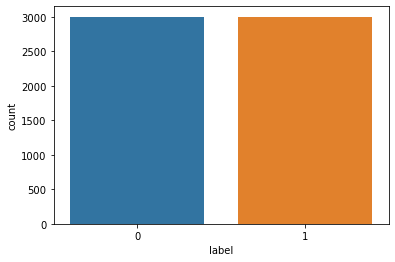

In [105]:
# displaying the number of fake and real samples
sb.countplot(data_final['label'])

In [106]:
# calculating the length( total no of characters in a sample)
data_final['text_len']=data_final['text'].apply(lambda x:len(x))


In [107]:
# plotting the text lenth for all samples
data_final['text_len'].iplot(kind='hist',bins=50,xTitle='Text Length',yTitle='Count',title='All Data samples Text Length')

In [108]:
from textblob import TextBlob
# calculating the polarity
data_final['polarity']=data_final['text'].apply(lambda x:TextBlob(x).sentiment.polarity)
# polairy +1 highy positive sentiment
# polarity -1 highly negative
# polarity 0 neutral

In [109]:
# plotting the polarity for all the samples
data_final['polarity'].iplot(kind='hist',colors='orange',bins=50,xTitle='Polarity',yTitle='Count',
                            title='Text Polarity Distribution')


In [110]:
# avg word length : calculating the characters (excluding space)
def get_avg_word_len(x):
    words=x.split()
    word_len=0
    for word in words:
        word_len=word_len+len(word)
    return word_len/len(words)


In [111]:
# applying the get_avg_word_len to all samples in the data_final
data_final['avg_word_len']=data_final['text'].apply(lambda x:get_avg_word_len(x))

In [112]:
# plotting the avg_word_len for all samples
data_final['avg_word_len'].iplot(kind='hist',bins=30,xTitle='Average Word Length ',yTitle='Count',title='Average Word Length Distribution')

In [113]:
#total words in a sample
data_final['total_words']=data_final['text'].apply(lambda x:len(x.split()))

In [114]:
# plotting the total words for all observations
data_final['total_words'].iplot(kind='hist',bins=30,xTitle='Word Count',yTitle='Count',title='Word Count Distribution')

In [115]:
# fake news data with fake (label=0)
data_final_fake=data_final[data_final['label']==0]

In [116]:
# calculating the length( total no of characters in a sample)
data_final_fake['text_len']=data_final_fake['text'].apply(lambda x:len(x))
data_final_fake['text_len'].mean()

1808.3343333333332

In [117]:
# no of words used in fake_data
data_final_fake['total_words']=data_final_fake['text'].apply(lambda x:len(x.split()))
# calcultaing the mean
data_final_fake['total_words'].mean()

304.1483333333333

In [118]:
# plotting the no of fake words in data_final_fake
data_final_fake['total_words'].iplot(kind='hist',bins=100,xTitle='Word Count',yTitle='Count',title='Fake Data Word Count Distribution')


In [119]:
# average word length (no. of characters)
data_final_fake['avg_word_len']=data_final_fake['text'].apply(lambda x:get_avg_word_len(x))

In [120]:
# average
data_final_fake['avg_word_len'].mean()

5.554230551034609

In [121]:
# plotting average word length for fake data
data_final_fake['avg_word_len'].iplot(kind='hist',bins=100,xTitle='Average Word Length ',yTitle='Count',title='Average Word Length in Fake data Distribution')

In [122]:
# checking polarity for fake samples
data_final_fake['polarity']=data_final_fake['text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [123]:
#plotting polarity for fake samples
data_final_fake['polarity'].iplot(kind='hist',xTitle='Polarity ',yTitle='Count',title='Fake data polarity Distribution')

In [124]:
# no of unique words in fake samples
data_final_fake['unique_words']=data_final_fake['text'].apply(lambda x:len(set(x.split())))

In [125]:
data_final_fake['unique_words'].mean()

160.78633333333335

In [126]:
# plotting the no of unique words for fake samples
data_final_fake['unique_words'].iplot(kind='hist',bins=100,xTitle='Unique words ',yTitle='Count',title='Unique words in fake data Distribution')

In [127]:
# no of special characters used in fake samples
data_final_fake['special_char']=data_final_fake['text'].apply(lambda x: sum(not y.isalpha() for y in x ))

In [128]:
data_final_fake['special_char'].mean()

382.71566666666666

In [129]:
# plotting the no of special characters used in fake samples
data_final_fake['special_char'].iplot(kind='hist',bins=100,xTitle='Special Characters ',yTitle='Count',title='Special Characters in Fake data Distribution')

In [130]:
# no of uppercase words used in fake samples
data_final_fake['uppercase_words']=data_final_fake['text'].apply(lambda x:sum(y.isupper() for y in x.split()))

In [131]:
data_final_fake['uppercase_words'].mean()

4.666666666666667

In [132]:
# plotting the no of uppercase words used inn fake samples
data_final_fake['uppercase_words'].iplot(kind='hist',bins=110,xTitle='Uppercase words ',yTitle='Count',title='Uppercase Words in Fake Data Distribution')

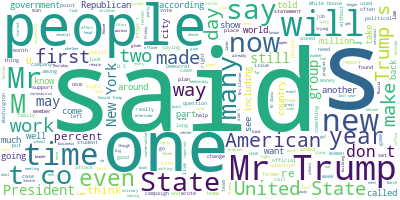

In [133]:
# wordcloud for words in fake data
from wordcloud import WordCloud
data_final_fake=data_final[data_final['label']==0]
long_string=','.join(list(data_final_fake['text'].values))
wordcloud=WordCloud(background_color='white',max_words=1000,contour_width=3,contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [134]:
# real data samples

In [135]:
data_final_real=data_final[data_final['label']==1]
# no of words used in real data samples
data_final_real['total_words']=data_final_real['text'].apply(lambda x:len(x.split()))
data_final_real['total_words'].iplot(kind='hist',bins=30,xTitle='Word Count',yTitle='Count',title='Real Data Word Count Distribution')


In [136]:
# calculating the length( total no of characters in a sample)
data_final_real['text_len']=data_final_real['text'].apply(lambda x:len(x))
data_final_real['text_len'].mean()

1692.86

In [137]:
data_final_real['total_words'].mean()

278.711

In [138]:
# average word length(no of characters in real samples)
data_final_real['avg_word_len']=data_final_real['text'].apply(lambda x:get_avg_word_len(x))

In [139]:
data_final_real['avg_word_len'].mean()

5.787073988115162

In [140]:
#plotting average word length for real data samples
data_final_real['avg_word_len'].iplot(kind='hist',bins=100,xTitle='Average Word Length ',yTitle='Count',title='Average Word Length in Real data Distribution')

In [141]:
#checking polarity
data_final_real['polarity']=data_final_real['text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [142]:
# displaying the polarity plotfor real data samples
data_final_real['polarity'].iplot(kind='hist',xTitle='Polarity ',yTitle='Count',title='Real data polarity Distribution')

In [143]:
# no of unique words present in the real data smples
data_final_real['unique_words']=data_final_real['text'].apply(lambda x:len(set(x.split())))

In [144]:
data_final_real['unique_words'].mean()

146.00933333333333

In [145]:
# plotting the no of unique words
data_final_real['unique_words'].iplot(kind='hist',bins=100,xTitle='Unique words ',yTitle='Count',title='Unique words in real data Distribution')

In [146]:
# no of special characters used in real data samples
data_final_real['special_char']=data_final_real['text'].apply(lambda x: sum(not y.isalpha() for y in x ))

In [147]:
data_final_real['special_char'].mean()

349.7783333333333

In [94]:
# displaying the no of special characters in real data samples
data_final_real['special_char'].iplot(kind='hist',bins=100,xTitle='Special Characters ',yTitle='Count',title='Special Characters in Real data Distribution')

KeyError: 'special_char'

In [153]:
# no of uppercase words used in real data samples
data_final_real['uppercase_words']=data_final_real['text'].apply(lambda x:sum(y.isupper() for y in x.split()))

In [154]:
data_final_real['uppercase_words'].mean()

5.943333333333333

In [148]:
# displaying no of uupercase words distribution
data_final_real['uppercase_words'].iplot(kind='hist',bins=100,xTitle='Uppercase words ',yTitle='Count',title='Uppercase Words in Real Data Distribution')

KeyError: 'uppercase_words'

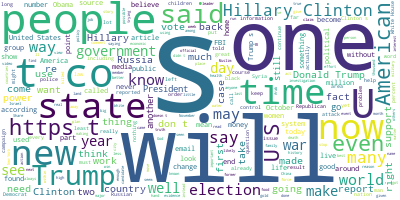

In [149]:
#wordcloud for words in real data samples
data_final_real=data_final[data_final['label']==1]
long_string=','.join(list(data_final_real['text'].values))
wordcloud=WordCloud(background_color='white',max_words=1000,contour_width=3,contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

# Summary

In [150]:
x={'Average Word Count':[305,280],'Average Word Length':[5,6],'Average Unique Words':[160,140],'Polarity':['neutral','neutral'],
   'Average Special characters':[380,350],'Average Uppercase Word':[5,6],'Average text Length':[1800,1700],
  }

table=pd.DataFrame(x,index=['Fake','Real'])


table.head()

,Average Word Count,Average Word Length,Average Unique Words,Polarity,Average Special characters,Average Uppercase Word,Average text Length
Fake,305,5,160,neutral,380,5,1800
Real,280,6,140,neutral,350,6,1700


# Data Preprocessing

In [151]:
# importing the required libraries

In [152]:
import re 
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
le=WordNetLemmatizer()
ps=PorterStemmer()
from nltk.tokenize import word_tokenize
import contractions
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\warda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\warda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [153]:
def preprocess_data(text):
  # lower case text
    text=text.lower()
  # regex to remove unnecessary tags
    text=re.sub(r'\@\w+|\&#\w+','',text)
  # regex to remove urls
    text=re.sub(r'http\S+|https\S+|www.\S+','',text)
    text=re.sub(r'[^a-zA-Z0-9]',' ',text)
  # removing punctuations
    text=text.translate(str.maketrans('','',string.punctuation))
  # tokenizing the text
    text_tokens=word_tokenize(text)
  # removing contractions
    text_tokens=[contractions.fix(i) for i in text_tokens]
  #removing stopwords
    text_stopwords=[word for word in text_tokens if not word in stopwords]
  # lemmatizing the tokens
    text_lemma=[le.lemmatize(word)for word in text_stopwords]
    return text_lemma

In [154]:
# converting data_final['text'] to a list
cleaned_data=data_final['text'].tolist()

In [155]:
# passing the list of texts to preprocess_data function
cleaned_data=[preprocess_data(text) for text in cleaned_data]

In [156]:
#creating a new list to store the preprocessed text
new_list=[]
for t in range(len(cleaned_data)):
    z=' '.join(t for t in cleaned_data[t])
    new_list.append(z)

In [157]:
data_cleaned=pd.DataFrame(new_list,columns=['text'])
#data_cleaned

In [158]:
data_final['clean_text']=data_cleaned

data_final.head()


,index,text,label,text_len,polarity,avg_word_len,total_words,clean_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930,0.006777,5.001220,820,house dem aide even see comey letter jason cha...
1,2,"Why the Truth Might Get You Fired October 29, ...",1,7692,0.056258,5.059242,1266,truth might get fired october 29 2016 tension ...
2,3,Videos 15 Civilians Killed In Single US Airstr...,1,3237,0.017497,4.788151,557,video 15 civilian killed single u airstrike id...
3,4,Print \nAn Iranian woman has been sentenced to...,1,938,-0.012500,5.071429,154,print iranian woman sentenced six year prison ...
4,12,The mystery surrounding The Third Reich and Na...,1,2854,-0.102334,5.330377,451,mystery surrounding third reich nazi germany s...


In [159]:
# trying to find the commonly occuring words

In [160]:
from nltk import bigrams  
from nltk import trigrams  
from nltk.util import ngrams
import itertools # flattening the list

In [161]:
# for fake news data

cleaned_data_fake=data_final_fake['text'].tolist()


In [162]:
# cleaning the data
cleaned_data_fake=[preprocess_data(text) for text in cleaned_data_fake]
data_grams=cleaned_data_fake

In [163]:
# calling bigram,trigram,ngram 5, unigram methods
bigram_terms=[list(bigrams(text))for text in data_grams]
trigram_terms=[list(trigrams(text))for text in data_grams]
ngrams_terms=[list(ngrams(text,5))for text in data_grams]
unigram_term=[list(ngrams(text,1))for text in data_grams]

In [174]:
# using the itertools chain method to get a long lsit of words
bigram_term=list(itertools.chain(*bigram_terms))
trigram_term=list(itertools.chain(*trigram_terms))
ngrams_term=list(itertools.chain(*ngrams_terms))
unigram_term=list(itertools.chain(*unigram_term))

In [175]:
from collections import Counter
#  Counter to count 
unigram_counts=Counter(unigram_term)
unigram_df=pd.DataFrame(unigram_counts.most_common(10),columns=['Unigram','Frequency'])

<AxesSubplot:xlabel='Frequency', ylabel='Unigram'>

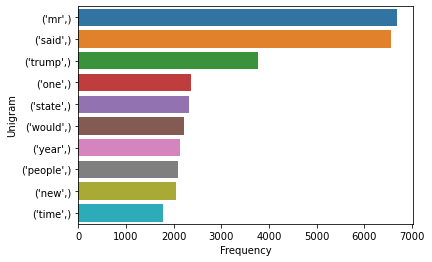

In [176]:
# plotting the most frequently occuring unigrams
import seaborn as sns
sns.barplot(x='Frequency',y='Unigram',data=unigram_df)

In [177]:
# applying Counter mehtod on bigrams
bigram_counts=Counter(bigram_term)
bigram_df=pd.DataFrame(bigram_counts.most_common(10),columns=['Bigram','Frequency'])


<AxesSubplot:xlabel='Frequency', ylabel='Bigram'>

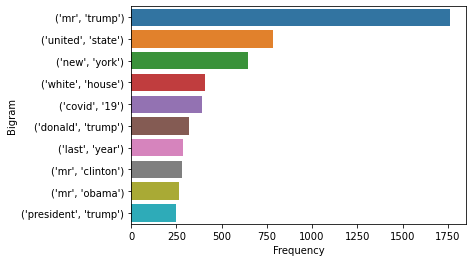

In [178]:
# displaying the 10 frequently occuring bigrams
import seaborn as sns
sns.barplot(x='Frequency',y='Bigram',data=bigram_df)

<AxesSubplot:xlabel='Frequency', ylabel='Trigram'>

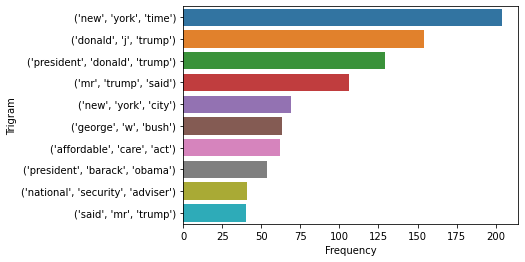

In [179]:
# calling Counter method on trigrams
trigram_counts=Counter(trigram_term)
trigram_df=pd.DataFrame(trigram_counts.most_common(10),columns=['Trigram','Frequency'])
# displaying frequently occuring trigrams
import seaborn as sns
sns.barplot(x='Frequency',y='Trigram',data=trigram_df)

<AxesSubplot:xlabel='Frequency', ylabel='Ngram'>

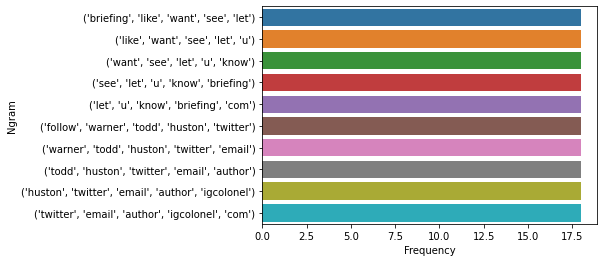

In [180]:
# using Counter for 5grams 
ngram_counts=Counter(ngrams_term)
ngram_df=pd.DataFrame(ngram_counts.most_common(10),columns=['Ngram','Frequency'])
# displaying the frequently occurring 5 words
import seaborn as sns
sns.barplot(x='Frequency',y='Ngram',data=ngram_df)

In [181]:
# for real news data
cleaned_data_real=data_final_real['text'].tolist()

In [182]:
# cleaning the real news samples data
cleaned_data_real=[preprocess_data(text) for text in cleaned_data_real]
data_grams=cleaned_data_real

In [183]:
# defining bigram,trigram,unigram,ngram 
bigram_terms=[list(bigrams(text))for text in data_grams]
trigram_terms=[list(trigrams(text))for text in data_grams]
ngrams_terms=[list(ngrams(text,5))for text in data_grams]
unigram_term=[list(ngrams(text,1))for text in data_grams]

In [184]:
# calling chain method from itertools module to get a list of all words
bigram_term=list(itertools.chain(*bigram_terms))
trigram_term=list(itertools.chain(*trigram_terms))
ngrams_term=list(itertools.chain(*ngrams_terms))
unigram_term=list(itertools.chain(*unigram_term))

In [185]:
from collections import Counter
# Counter method is used to count the terms
unigram_counts=Counter(unigram_term)
unigram_df=pd.DataFrame(unigram_counts.most_common(10),columns=['Unigram','Frequency'])

<AxesSubplot:xlabel='Frequency', ylabel='Unigram'>

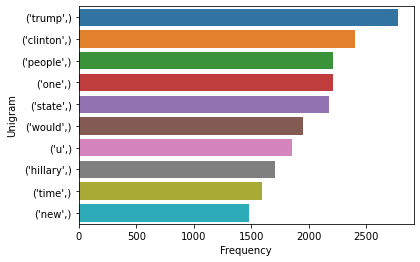

In [186]:
# displaying most frequent unigram
import seaborn as sns
sns.barplot(x='Frequency',y='Unigram',data=unigram_df)

In [187]:
# applying Counter method on bigram
bigram_counts=Counter(bigram_term)
# displaying most frequent bigrams
bigram_df=pd.DataFrame(bigram_counts.most_common(10),columns=['Bigram','Frequency'])

<AxesSubplot:xlabel='Frequency', ylabel='Bigram'>

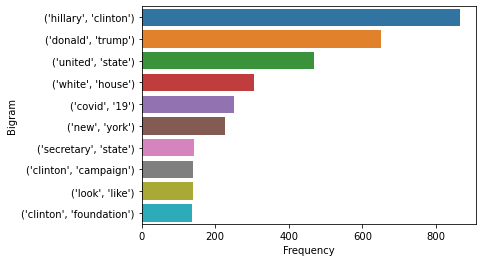

In [188]:
# displaying most frequent bigrams
import seaborn as sns
sns.barplot(x='Frequency',y='Bigram',data=bigram_df)

<AxesSubplot:xlabel='Frequency', ylabel='Trigram'>

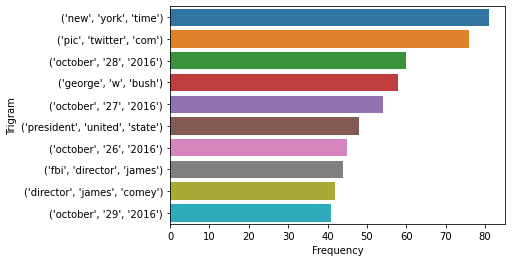

In [189]:
# applying Counter on trigrams
trigram_counts=Counter(trigram_term)
trigram_df=pd.DataFrame(trigram_counts.most_common(10),columns=['Trigram','Frequency'])
import seaborn as sns
sns.barplot(x='Frequency',y='Trigram',data=trigram_df)

<AxesSubplot:xlabel='Frequency', ylabel='Ngram'>

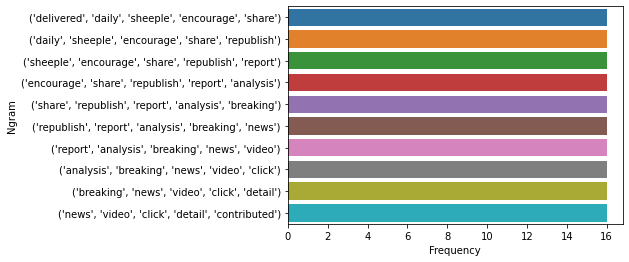

In [190]:
# applying Counter on ngrams
ngram_counts=Counter(ngrams_term)
ngram_df=pd.DataFrame(ngram_counts.most_common(10),columns=['Ngram','Frequency'])
# displaying the most frequent words
import seaborn as sns
sns.barplot(x='Frequency',y='Ngram',data=ngram_df)

In [191]:
# Named Entity Recognition

In [192]:
# named entity recognition for fake data
import spacy
nlp=spacy.load('en_core_web_sm')
# trained for entities,vocabular,syntax

In [193]:
# defining a function to get entity for every word in fake data samples
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=data_final_fake['text'].apply(lambda x : ner(x))
# calling the ner function
ent=[x for sub in ent for x in sub]
# countign the entities
counter=Counter(ent)
count=counter.most_common()

In [195]:
# named entity recognition for real data samples
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=data_final_real['text'].apply(lambda x : ner(x))
# calling the function ner
ent=[x for sub in ent for x in sub]
# counting the enitites
counter=Counter(ent)
count=counter.most_common()

<AxesSubplot:>

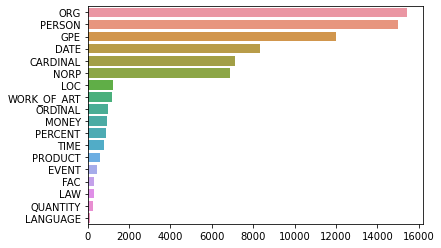

In [196]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

# Summary



#### In Unigrams comaprison, words like 'Trump','mr' ,'said' are more frequently occuring in fake samples.
#### In Bigrams comaprison, similary 'mr,'trump' occurs more frequent.
#### We can observe that PERSON entity appears more in fake data samples than real.
#### However,in real data samples the PERSON and ORG entities count is also same

# Classification Model Building

In [166]:
# Vectorization
# Count Vectorizer-- Convert a collection of text documents to a matrix of token counts
count_vectorizer=CountVectorizer(analyzer=preprocess_data)
count_vectorized=count_vectorizer.fit_transform(data_final['text'])
#print(count_vectorized.toarray())

In [167]:
# defining input and output data
X=count_vectorized.toarray()
y=data_final['label']

In [168]:
#splitting X,y into train and test sets
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2)

In [171]:
xtest.shape,ytest.shape

((1200, 45084), (1200,))

In [209]:
#Multinomial Model
NB=MultinomialNB()
#fitting xtrain,ytrain
NB.fit(xtrain,ytrain)
#predicting the xtest
predicted=NB.predict(xtest)
#finding the accuracy
accuracy=np.mean(predicted==ytest)*100
print('The Naive Bayes model accuracy is:',accuracy)

The Naive Bayes model accuracy is: 77.33333333333333


In [210]:
#classification report 
print(classification_report(ytest,predicted))

              precision    recall  f1-score   support

           0       0.82      0.70      0.75       595
           1       0.74      0.84      0.79       605

    accuracy                           0.77      1200
   macro avg       0.78      0.77      0.77      1200
weighted avg       0.78      0.77      0.77      1200



<AxesSubplot:>

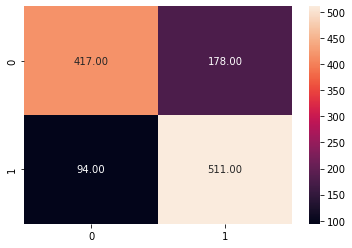

In [211]:
# displaying the confusion matrix
cm=confusion_matrix(ytest,predicted)
sb.heatmap(cm,annot=True,fmt='.02f')

In [212]:
# building Naive Bayes classifier with tfidf vectorization

In [172]:
#Convert a collection of raw documents to a matrix of TF-IDF (Term frequency-Inverse Document Frequency)features
tfidf_vectorizer=TfidfVectorizer(analyzer=preprocess_data)
tfidf_vectorized=tfidf_vectorizer.fit_transform(data_final['text'])
#print(tfidf_vectorized.toarray())

In [173]:
#input and output data
X=tfidf_vectorized.toarray()
y=data_final['label']
# splitting data into train and test sets
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2)

In [174]:
#Multinomial Model
NB=MultinomialNB()
#fitting xtrain,ytrain
NB.fit(xtrain,ytrain)
#predicting the xtest
predicted=NB.predict(xtest)
#finding the accuracy
accuracy=np.mean(predicted==ytest)*100
print('The accuracy of Naive Bayes model is:',accuracy)

The accuracy of Naive Bayes model is: 83.66666666666667


In [175]:
#classification report 
print(classification_report(ytest,predicted))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       609
           1       0.83      0.84      0.84       591

    accuracy                           0.84      1200
   macro avg       0.84      0.84      0.84      1200
weighted avg       0.84      0.84      0.84      1200



<AxesSubplot:>

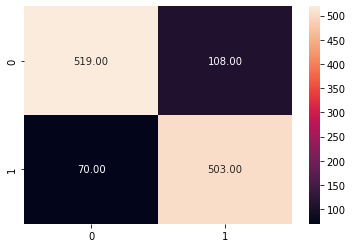

In [217]:
# displaying confusion matrix
cm=confusion_matrix(ytest,predicted)
sb.heatmap(cm,annot=True,fmt='.02f')

In [218]:
# Building model with pretrained word embeddings 
#GloVe stands for global vectors for word representation.generating word embeddings by aggregating 
# global word-word co-occurrence matrix from a corpus

In [219]:
# word embedding
words = [word_tokenize(sent) for sent in data_final['text']]
#padd in which each sentence length is fixed to 100
def padd(arr):
    for i in range(100-len(arr)):
        arr.append('<pad>')
    return arr[:100]
   
# call the padd function for each sentence in words
for i in range(len(words)):
    words[i]=padd(words[i])

In [220]:
# glove pretrained word embeddings downloaded
vocab_f = 'glove.6B.50d.txt'

embeddings_index = {}

with open(vocab_f, encoding='utf8') as f:
    for line in f:
        try:
            values = line.rstrip().rsplit(' ')
            word = values[0] # word 
            coefs = np.asarray(values[1:], dtype='float32') 
            embeddings_index[word] = coefs

        except:

              pass

# Embedding each word in a sentence

embedded_words = []
for each_sentence in words:
    embedded_words.append([])
    for word in each_sentence:
        if word.lower() in embeddings_index:
            embedded_words[-1].append(embeddings_index[word.lower()])

        else:
            # if the word to be embedded is '<padd>' append 0 fifty times
            embedded_words[-1].append([0]*50)

In [221]:
#importing libraries
import keras
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dense,Bidirectional
from nltk.tokenize import word_tokenize,sent_tokenize
from keras.layers import *
from keras.layers import Embedding
from sklearn.model_selection import train_test_split

In [222]:
#Converting x into numpy-array

X=np.array(embedded_words)
print(np.shape(X))

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
Y = enc.fit_transform(np.array(data_final['label']).reshape(-1,1)).toarray()
# Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#Defining the BiLSTM Model

def model(X,Y,input_size1,input_size2,output_size):

    m=Sequential()
# Here 100 denotes the dimensionality of output spaces.

    m.add(Bidirectional(LSTM(100,input_shape=(input_size1,input_size2))))# input_size1 rows,input_size2 columns

    m.add(Dropout(0.5))

    m.add(Dense(output_size,activation='softmax'))

    m.compile('Adam','categorical_crossentropy',['accuracy'])

    m.fit(X,Y,epochs=15, batch_size=128)

    return m

(6000, 100, 50)


In [223]:
bilstmModel=model(X_train,Y_train,100,50,2)

Epoch 1/15
38/38 [==============================] - 21s 366ms/step - loss: 0.6481 - accuracy: 0.6263
Epoch 2/15
38/38 [==============================] - 14s 374ms/step - loss: 0.5729 - accuracy: 0.7060
Epoch 3/15
38/38 [==============================] - 14s 375ms/step - loss: 0.5055 - accuracy: 0.7600
Epoch 4/15
38/38 [==============================] - 15s 382ms/step - loss: 0.4565 - accuracy: 0.7883
Epoch 5/15
38/38 [==============================] - 15s 387ms/step - loss: 0.4269 - accuracy: 0.8027
Epoch 6/15
38/38 [==============================] - 15s 389ms/step - loss: 0.4154 - accuracy: 0.8140
Epoch 7/15
38/38 [==============================] - 15s 393ms/step - loss: 0.3895 - accuracy: 0.8210
Epoch 8/15
38/38 [==============================] - 15s 386ms/step - loss: 0.3684 - accuracy: 0.8392
Epoch 9/15
38/38 [==============================] - 15s 395ms/step - loss: 0.3410 - accuracy: 0.8540
Epoch 10/15
38/38 [==============================] - 14s 362ms/step - loss: 0.3368 - accura

In [224]:
bilstmModel.evaluate(X_test,Y_test)

38/38 [==============================] - 3s 32ms/step - loss: 0.4799 - accuracy: 0.8217


[0.4799218773841858, 0.8216666579246521]

In [225]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#Defining the BiLSTM Model

#def model(X,Y,input_size1,input_size2,output_size):

m=Sequential()
# Here 100 denotes the dimensionality of output spaces.

m.add(Bidirectional(LSTM(100,input_shape=(100,50))))# input_size1 rows,input_size2 columns

m.add(Dropout(0.5))

m.add(Dense(2,activation='softmax'))

m.compile('Adam','categorical_crossentropy',['accuracy'])

m.fit(X_train,Y_train,epochs=15, batch_size=128)


Epoch 1/15
38/38 [==============================] - 20s 347ms/step - loss: 0.6476 - accuracy: 0.6160
Epoch 2/15
38/38 [==============================] - 14s 377ms/step - loss: 0.5533 - accuracy: 0.7244
Epoch 3/15
38/38 [==============================] - 14s 378ms/step - loss: 0.5006 - accuracy: 0.7660
Epoch 4/15
38/38 [==============================] - 14s 374ms/step - loss: 0.4664 - accuracy: 0.7842
Epoch 5/15
38/38 [==============================] - 14s 372ms/step - loss: 0.4397 - accuracy: 0.8006
Epoch 6/15
38/38 [==============================] - 14s 359ms/step - loss: 0.4228 - accuracy: 0.8110
Epoch 7/15
38/38 [==============================] - 14s 380ms/step - loss: 0.4091 - accuracy: 0.8163
Epoch 8/15
38/38 [==============================] - 14s 377ms/step - loss: 0.3806 - accuracy: 0.8348
Epoch 9/15
38/38 [==============================] - 14s 373ms/step - loss: 0.3555 - accuracy: 0.8454
Epoch 10/15
38/38 [==============================] - 15s 383ms/step - loss: 0.3310 - accura

In [226]:
m.evaluate(X_test,Y_test)

38/38 [==============================] - 3s 33ms/step - loss: 0.3857 - accuracy: 0.8233


[0.3856843113899231, 0.8233333230018616]

<AxesSubplot:>

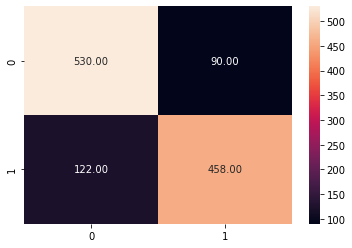

In [227]:
predict_x=m.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
Y_test1=np.argmax(Y_test,axis=1)
cm=confusion_matrix(Y_test1,classes_x)
sb.heatmap(cm,annot=True,fmt='.02f')
#print(classification_report(Y_test1,classes_x))

In [228]:
print(classification_report(Y_test1,classes_x))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       620
           1       0.84      0.79      0.81       580

    accuracy                           0.82      1200
   macro avg       0.82      0.82      0.82      1200
weighted avg       0.82      0.82      0.82      1200



In [229]:
#!pip install transformers

In [230]:
# necessary libraries
from tqdm.auto import tqdm # shows progress
from transformers import BertTokenizer


In [231]:
# downloading pretrained 'bert-base-cased'
tokenizer=BertTokenizer.from_pretrained('bert-base-cased')

In [232]:
x_input_ids=np.zeros((len(data_final),256)) #  (no of samples, 256) 512 length of sentence in bert
x_attn_masks=np.zeros((len(data_final),256))

In [233]:
def generate_training_data(df,ids,masks,tokenizer):
    for i,text in tqdm(enumerate(data_final['text'])):
        tokenized_text=tokenizer.encode_plus(
            text,
            max_length=256, # for easy computation
            truncation=True,
            padding='max_length',
            add_special_tokens=True, # special tokens PAD,CLS,SEP,
            return_tensors='tf'  # returns token type ids, input_ids, attention_masks
        )
        ids[i,:]=tokenized_text.input_ids  # bert requires inpout_ids, attention masks
        masks[i,:]=tokenized_text.attention_mask # for every sample , append input_ids, attentions_masks 
    return ids,masks


In [234]:
# to populate input id's and input masks
x_input_ids,x_attn_masks=generate_training_data(data_final,x_input_ids,x_attn_masks,tokenizer)

0it [00:00, ?it/s]

In [235]:
x_input_ids.shape

(6000, 256)

In [236]:
# creating target variable, two classes fake/real
labels=np.zeros((len(data_final),2))

In [237]:
labels[np.arange(len(data_final)),data_final['label'].values]=1
# one hot encoding, wherever the value is given , populate it to 1

In [238]:
labels.shape
# 60000,2

(6000, 2)

In [239]:
# getting dataset , which helps in batch processing
dataset=tf.data.Dataset.from_tensor_slices((x_input_ids,x_attn_masks,labels))

In [240]:
dataset.take(1) # shape of single input

<TakeDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(2,), dtype=tf.float64, name=None))>

In [241]:
# defining a function to map dataset to attach keys
def fakenews_dataset(input_ids,attn_masks,labels):
    return {
        'input_ids':input_ids,
        'attention_mask':attn_masks
    },labels

In [242]:
# applying function
dataset=dataset.map(fakenews_dataset)

In [243]:
dataset.take(1)

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.float64, name=None)}, TensorSpec(shape=(2,), dtype=tf.float64, name=None))>

In [244]:
# shuffling the dataset and defining batch size
dataset=dataset.shuffle(6000).batch(16,drop_remainder=True)

In [245]:
# training and testing data sets
p=.8  # 80% for training and 20% for validation
train_size=int(p*len(data_final))
train_size

4800

In [246]:
# splitting data into train and validation sets
train_dataset=dataset.take(train_size)
val_dataset=dataset.skip(train_size)

In [247]:
train_dataset

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 2), dtype=tf.float64, name=None))>

In [248]:
# from huggingface library
from transformers import TFBertModel 


In [249]:
# downloading the model 
bert_model=TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [250]:
# building the model
# two inputs for bert-model (input_ids, attn_masks)
input_ids=tf.keras.layers.Input(shape=(256,),name='input_ids',dtype='int32')
attention_masks=tf.keras.layers.Input(shape=(256,),name='attention_mask',dtype='int32')
bert_embds=bert_model.bert(input_ids,attention_mask=attention_masks)[1] 
intermediate_layer=tf.keras.layers.Dense(512,activation='relu',name='intermediate_layer')(bert_embds)
output_layer=tf.keras.layers.Dense(2,activation='softmax',name='output_layer')(intermediate_layer) # two ouputs fake/real
# dropout can be added
# for improving results
model=tf.keras.Model(inputs=[input_ids,attention_masks],outputs=output_layer)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                           

In [251]:
# loss function optimizer accuracy
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5,decay=1e-6)
loss_func=tf.keras.losses.BinaryCrossentropy()
acc=tf.keras.metrics.BinaryAccuracy('accuracy')


In [252]:
# defining model checkpoint to save it
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
keras_callback=[ModelCheckpoint('C:\\Users\\warda\\NLP_Training\\project_fakenews',monitor='val_loss',save_best_only=True)] 

In [253]:
# compiling the model
model.compile(optimizer=optimizer,loss=loss_func,metrics=[acc])
# fitting the model
history=model.fit(
train_dataset,
validation_data=val_dataset,
epochs=10)

Epoch 1/10
  5/375 [..............................] - ETA: 2:53:41 - loss: 0.7398 - accuracy: 0.3625

KeyboardInterrupt: 

In [ ]:
#saving model with 80% accuracy
model.save('fakenews_model')

In [173]:
#opening the saved model
loaded_model=tf.keras.models.load_model('fakenews_model')

In [174]:
# to input any text
input_text='kill i got court the day after earl'
# tokenize it 
def prepare_data(input_text,tokenizer):
    token=tokenizer.encode_plus(
            input_text,
            max_length=256,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='tf'
        )
    
    return { 'input_ids':tf.cast(token.input_ids,tf.float64),
             'attention_mask':tf.cast(token.attention_mask,tf.float64)}

In [182]:
tokenized_input_text=prepare_data(input_text,tokenizer)

In [183]:
# predicting the input_text
probs=loaded_model.predict(tokenized_input_text)

In [184]:
probs

array([[0.5299527, 0.4700473]], dtype=float32)

In [186]:
# getting the index of higher probability value
np.argmax(probs[0])

0